<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

# DonorsChoose

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import math
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

import dill #To store session variables
#https://stackoverflow.com/questions/34342155/how-to-pickle-or-store-jupyter-ipython-notebook-session-for-later

## 1.1 Reading Data

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [0]:
ls "drive/My Drive/Colab Notebooks"

3_DonorsChoose_KNN_final.ipynb  glove.6B.50d.txt    knn.sess
4_DonorsChoose_NB_final.ipynb   glove_vectors_30    resources.csv
5_DonorsChoose_LR_final.ipynb   glove_vectors_300d  train_data.csv


In [0]:
project_data = pd.read_csv('drive/My Drive/Colab Notebooks/train_data.csv')
resource_data = pd.read_csv('drive/My Drive/Colab Notebooks/resources.csv')

In [0]:
project_data_1=project_data[project_data['project_is_approved']==1]
project_data_0=project_data[project_data['project_is_approved']==0]

print(project_data_1.shape)
print(project_data_0.shape)

#Creating a dataset of 0.2k points containg points from both the classes
project_data = project_data_1[0:33458].append(project_data_0[0:16542])
print(project_data['project_is_approved'].value_counts())
print(project_data.shape)

(92706, 17)
(16542, 17)
1    33458
0    16542
Name: project_is_approved, dtype: int64
(50000, 17)


In [0]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (50000, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [0]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]

#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)

# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]

project_data.head(2)

Unnamed: 0  ... project_is_approved
473        100660  ...                   1
29891      146723  ...                   1

[2 rows x 17 columns]

In [0]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity   price
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1  149.00
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   14.95

## 1.2 preprocessing of `project_subject_categories`

In [0]:
categories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in categories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [0]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [0]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [0]:
project_data.head(2)

Unnamed: 0  ...                                              essay
473        100660  ...  I recently read an article about giving studen...
29891      146723  ...  It's the end of the school year. Routines have...

[2 rows x 18 columns]

In [0]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])

I recently read an article about giving students a choice about how they learn. We already set goals; why not let them choose where to sit, and give them options of what to sit on?I teach at a low-income (Title 1) school. Every year, I have a class with a range of abilities, yet they are all the same age. They learn differently, and they have different interests. Some have ADHD, and some are fast learners. Yet they are eager and active learners that want and need to be able to move around the room, yet have a place that they can be comfortable to complete their work.We need a classroom rug that we can use as a class for reading time, and students can use during other learning times. I have also requested four Kore Kids wobble chairs and four Back Jack padded portable chairs so that students can still move during whole group lessons without disrupting the class. Having these areas will provide these little ones with a way to wiggle while working.Benjamin Franklin once said, \"Tell me an

In [0]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [0]:
sent = decontracted(project_data['essay'].values[2000])
print(sent)
print("="*50)

My school is in a low socio-economic area with a high ELL population. The students in my classroom do not have a lot of academic practice outside of the school day. They love coming to school everyday and are eager to learn. They work very hard and are so excited when they master new concepts.  \r\n   At my school site we strive to make the most of every minute during the school day in order to ensure students are able to learn and feel successful. We know that the time we have with them is very precious!I am asking for the mini white boards and reusable write and wipe pockets in order to help me monitor my students thinking and learning. Often times, when work is done on worksheets the feedback to students is not meaningful because it can take awhile to give each student individual feed back. The white boards and write and wipe pockets will give students a way to show written responses while we are gathered at the carpet together. This will allow me to give immediate feedback to stude

In [0]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My school is in a low socio-economic area with a high ELL population. The students in my classroom do not have a lot of academic practice outside of the school day. They love coming to school everyday and are eager to learn. They work very hard and are so excited when they master new concepts.       At my school site we strive to make the most of every minute during the school day in order to ensure students are able to learn and feel successful. We know that the time we have with them is very precious!I am asking for the mini white boards and reusable write and wipe pockets in order to help me monitor my students thinking and learning. Often times, when work is done on worksheets the feedback to students is not meaningful because it can take awhile to give each student individual feed back. The white boards and write and wipe pockets will give students a way to show written responses while we are gathered at the carpet together. This will allow me to give immediate feedback to student

In [0]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My school is in a low socio economic area with a high ELL population The students in my classroom do not have a lot of academic practice outside of the school day They love coming to school everyday and are eager to learn They work very hard and are so excited when they master new concepts At my school site we strive to make the most of every minute during the school day in order to ensure students are able to learn and feel successful We know that the time we have with them is very precious I am asking for the mini white boards and reusable write and wipe pockets in order to help me monitor my students thinking and learning Often times when work is done on worksheets the feedback to students is not meaningful because it can take awhile to give each student individual feed back The white boards and write and wipe pockets will give students a way to show written responses while we are gathered at the carpet together This will allow me to give immediate feedback to students and then can 

In [0]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [0]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████| 50000/50000 [00:27<00:00, 1834.67it/s]


In [0]:
#adding a new column for the processed essay text
project_data['clean_essay']=preprocessed_essays
print(project_data.columns)

# after preprocesing
preprocessed_essays[2000]

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'clean_essay'],
      dtype='object')


'school low socio economic area high ell population students classroom not lot academic practice outside school day love coming school everyday eager learn work hard excited master new concepts school site strive make every minute school day order ensure students able learn feel successful know time precious asking mini white boards reusable write wipe pockets order help monitor students thinking learning often times work done worksheets feedback students not meaningful take awhile give student individual feed back white boards write wipe pockets give students way show written responses gathered carpet together allow give immediate feedback students modify responses right lead meaningful learning processing nannan'

<h2><font color='red'> 1.4.1 Preprocessing of `project_title`</font></h2>

In [0]:
project_data.head(2)

Unnamed: 0  ...                                        clean_essay
473        100660  ...  recently read article giving students choice l...
29891      146723  ...  end school year routines run course students n...

[2 rows x 19 columns]

In [0]:
#Printing a few random review summaries

for i in range(1,3000,1000):
    sent = project_data['project_title'].values[i]
    print(sent,'--- Row No:',i)
    print("="*50)

Breakout Box to Ignite Engagement! --- Row No: 1
Cozy Classroom Carpet for Learning --- Row No: 1001
Community Circle Carpet: A Place to Call Home! --- Row No: 2001


In [0]:
# The above random records show that there are no URLs or HTML tags, but we will remove incase if there are any

from tqdm import tqdm #for status bar
from bs4 import BeautifulSoup #for html tags

preprocessed_title=[]

for title in tqdm(project_data['project_title'].values):
    # To remove urls - https://stackoverflow.com/a/40823105/4084039
    title = re.sub(r"http\S+", "", title)
    
    # To remove all HTML tags
    #https://stackoverflow.com/questions/16206380/python-beautifulsoup-how-to-remove-all-tags-from-an-element
    title = BeautifulSoup(title, 'lxml').get_text()
    
    # To split contractions - refer decontracted function defined above
    title = decontracted(title)
    
    # To remove alphanumerics (words with numbers in them) - https://stackoverflow.com/a/18082370/4084039
    title = re.sub("\S*\d\S*", "", title).strip()
    
    # To remove special characters - https://stackoverflow.com/a/5843547/4084039
    title = re.sub('[^A-Za-z]+', ' ', title)
    
    # To remove stop words from the summaries and convert to lowercase
    title = ' '.join(e.lower() for e in title.split() if e.lower() not in stopwords)
    preprocessed_title.append(title.strip())

#adding a new column for cleaned titles
project_data['clean_title']=preprocessed_title
print(project_data.columns)

100%|██████████| 50000/50000 [00:12<00:00, 3846.56it/s]

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'clean_essay',
       'clean_title'],
      dtype='object')


<h2><font color='red'> 1.4.2 Preprocessing of `teacher_prefix`</font></h2>

In [0]:

#replacing Nan values with 'Unknown'
project_data['teacher_prefix']=project_data['teacher_prefix'].replace(np.nan,'Unknown')

### 1.4.3 Combining resource_data with project_data

In [0]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

### 1.4.4 Adding word counts for Title and Essay

In [0]:
#https://stackoverflow.com/questions/54397096/how-to-do-word-count-on-pandas-dataframe

project_data['title_wc'] = project_data['clean_title'].str.count(' ')+1

project_data['essay_wc'] = project_data['clean_essay'].str.count(' ')+1

project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'clean_essay',
       'clean_title', 'price', 'quantity', 'title_wc', 'essay_wc'],
      dtype='object')

### 1.4.5 Adding sentiment scores for each essay

In [0]:
#http://t-redactyl.io/blog/2017/04/using-vader-to-handle-sentiment-analysis-with-social-media-text.html

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

project_data['senti_score'] = 0
project_data['senti_score'] = project_data['senti_score'].astype(float)

anlyzr = SentimentIntensityAnalyzer()

for index in project_data.index:
  project_data.at[index, 'senti_score'] = anlyzr.polarity_scores(project_data.at[index,'clean_essay'])['compound']
  
print(project_data.columns)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'clean_essay',
       'clean_title', 'price', 'quantity', 'title_wc', 'essay_wc',
       'senti_score'],
      dtype='object')


## 1.5 Preparing data for models

In [0]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'clean_essay',
       'clean_title', 'price', 'quantity', 'title_wc', 'essay_wc',
       'senti_score'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

# 2. K Nearest Neighbor

## 2.1 Splitting data into Train and cross validation(or test): Stratified Sampling

In [0]:
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

#Checking if there are any values other than 0 and 1
project_data['project_is_approved'].unique()

#https://answers.dataiku.com/2352/split-dataset-by-stratified-sampling
df_train, df_test = train_test_split(project_data, test_size = 0.3, stratify=project_data['project_is_approved'])
print(df_train.shape,df_test.shape)

(35000, 25) (15000, 25)


## 2.2 Make Data Model Ready: encoding numerical, categorical features

### 2.2.1 Vectorizing Categorical data

#### 2.2.1.1 Feature encoding for categories

In [0]:
# we use count vectorizer to convert the values into one
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
categories_one_hot_train = vectorizer.fit_transform(df_train['clean_categories'].values)
categories_one_hot_test = vectorizer.transform(df_test['clean_categories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrices after one hot encoding ",categories_one_hot_train.shape, categories_one_hot_test.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrices after one hot encoding  (35000, 9) (15000, 9)


#### 2.2.1.2 Feature encoding for subcategories

In [0]:
# we use count vectorizer to convert the values into one 
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
sub_categories_one_hot_train = vectorizer.fit_transform(df_train['clean_subcategories'].values)
sub_categories_one_hot_test = vectorizer.transform(df_test['clean_subcategories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrices after one hot encoding ",sub_categories_one_hot_train.shape, sub_categories_one_hot_test.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'Warmth', 'Care_Hunger', 'NutritionEducation', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrices after one hot encoding  (35000, 30) (15000, 30)


#### 2.2.1.3 Feature encoding for state

In [0]:
# we use count vectorizer to convert the values into one hot encoded features

#https://cmdlinetips.com/2018/01/how-to-get-unique-values-from-a-column-in-pandas-data-frame/
#To get unique values from school_state column

school_state_lst=project_data['school_state'].unique()

vectorizer = CountVectorizer(vocabulary = school_state_lst, lowercase=False, binary=True)

school_state_one_hot_train = vectorizer.fit_transform(df_train['school_state'].values)
school_state_one_hot_test = vectorizer.transform(df_test['school_state'].values)
print(vectorizer.get_feature_names())
print("Shape of matrices after one hot encoding ",school_state_one_hot_train.shape,school_state_one_hot_test.shape)

['GA', 'CA', 'OH', 'FL', 'MD', 'TX', 'NJ', 'OK', 'PA', 'WV', 'NC', 'CO', 'VA', 'AZ', 'MA', 'ID', 'MI', 'ME', 'WA', 'SC', 'LA', 'TN', 'MS', 'IN', 'KS', 'NY', 'KY', 'WI', 'MO', 'IA', 'SD', 'UT', 'IL', 'CT', 'NV', 'AL', 'MN', 'AR', 'DC', 'OR', 'NH', 'RI', 'HI', 'NE', 'NM', 'AK', 'ND', 'DE', 'MT', 'VT', 'WY']
Shape of matrices after one hot encoding  (35000, 51) (15000, 51)


#### 2.2.1.4 Feature encoding for teacher_prefix

In [0]:
# we use count vectorizer to convert the values into one hot encoded features

#https://cmdlinetips.com/2018/01/how-to-get-unique-values-from-a-column-in-pandas-data-frame/
#https://stackoverflow.com/questions/48090658/sklearn-how-to-incorporate-missing-data-when-one-hot-encoding

#fetching unique values
teacher_prefix_lst=project_data['teacher_prefix'].unique()

vectorizer = CountVectorizer(vocabulary = teacher_prefix_lst, lowercase=False, binary=True)

teacher_prefix_one_hot_train = vectorizer.fit_transform(df_train['teacher_prefix'].values)
teacher_prefix_one_hot_test = vectorizer.transform(df_test['teacher_prefix'].values)
print(vectorizer.get_feature_names())
print("Shape of matrices after one hot encoding ",teacher_prefix_one_hot_train.shape,teacher_prefix_one_hot_test.shape)

['Mrs.', 'Ms.', 'Mr.', 'Teacher', 'Unknown', 'Dr.']
Shape of matrices after one hot encoding  (35000, 6) (15000, 6)


#### 2.2.1.5 Feature encoding for project_grade_category

In [0]:
# we use count vectorizer to convert the values into one hot encoded features

#https://cmdlinetips.com/2018/01/how-to-get-unique-values-from-a-column-in-pandas-data-frame/
#To get unique values from project_grade_category column
grade_cat_lst=project_data['project_grade_category'].unique()

vectorizer = CountVectorizer(vocabulary = grade_cat_lst, lowercase=False, binary=True)

grade_cat_one_hot_train = vectorizer.fit_transform(df_train['project_grade_category'].values)
grade_cat_one_hot_test = vectorizer.transform(df_test['project_grade_category'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encoding ",grade_cat_one_hot_train.shape, grade_cat_one_hot_test.shape)

['Grades PreK-2', 'Grades 3-5', 'Grades 6-8', 'Grades 9-12']
Shape of matrix after one hot encoding  (35000, 4) (15000, 4)


### 2.2.2 Vectorizing Numerical features

#### 2.2.2.1 Vectorizing price

In [0]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)
print(df_train.columns)
price_scalar = StandardScaler()
price_scalar.fit(df_train['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_train_standardized = price_scalar.transform(df_train['price'].values.reshape(-1, 1))
price_test_standardized = price_scalar.transform(df_test['price'].values.reshape(-1, 1))

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'clean_essay',
       'clean_title', 'price', 'quantity', 'title_wc', 'essay_wc',
       'senti_score'],
      dtype='object')
Mean : 311.420728, Standard deviation : 367.14258141043206


#### 2.2.2.2 Vectorizing no. of previously posted projects

In [0]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

prev_proj_scalar = StandardScaler()
prev_proj_scalar.fit(df_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {prev_proj_scalar.mean_[0]}, Standard deviation : {np.sqrt(prev_proj_scalar.var_[0])}")

# Now standardize the data with above mean and variance.
prev_proj_train_standardized = prev_proj_scalar.transform(df_train['price'].values.reshape(-1, 1))
prev_proj_test_standardized = prev_proj_scalar.transform(df_test['price'].values.reshape(-1, 1))

Mean : 10.415914285714285, Standard deviation : 26.34324339275246


#### 2.2.2.3 Vectorizing word counts of project title

In [0]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

wc_title_scalar = StandardScaler()
wc_title_scalar.fit(df_train['title_wc'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {wc_title_scalar.mean_[0]}, Standard deviation : {np.sqrt(wc_title_scalar.var_[0])}")

# Now standardize the data with above mean and variance.
wc_title_train_standardized = wc_title_scalar.transform(df_train['title_wc'].values.reshape(-1, 1))
wc_title_test_standardized = wc_title_scalar.transform(df_test['title_wc'].values.reshape(-1, 1))

Mean : 3.6709428571428573, Standard deviation : 1.5467315667535324


#### 2.2.2.4 Vectorizing word counts of essay text

In [0]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

wc_essay_scalar = StandardScaler()
wc_essay_scalar.fit(df_train['essay_wc'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {wc_essay_scalar.mean_[0]}, Standard deviation : {np.sqrt(wc_essay_scalar.var_[0])}")

# Now standardize the data with above mean and variance.
wc_essay_train_standardized = wc_essay_scalar.transform(df_train['essay_wc'].values.reshape(-1, 1))
wc_essay_test_standardized = wc_essay_scalar.transform(df_test['essay_wc'].values.reshape(-1, 1))

Mean : 136.60225714285716, Standard deviation : 35.603008709813004


#### 2.2.2.5 Vectorizing sentimental scores of project essays

In [0]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

senti_score_scalar = StandardScaler()
senti_score_scalar.fit(df_train['senti_score'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {senti_score_scalar.mean_[0]}, Standard deviation : {np.sqrt(senti_score_scalar.var_[0])}")

# Now standardize the data with above mean and variance.
senti_score_train_standardized = senti_score_scalar.transform(df_train['senti_score'].values.reshape(-1, 1))
senti_score_test_standardized = senti_score_scalar.transform(df_test['senti_score'].values.reshape(-1, 1))

Mean : 0.9588567285714287, Standard deviation : 0.1516208779965365


## 2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

### 2.3.1 Vectorizing Text data

#### 2.3.1.1 Bag of words for essay text

In [0]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10, ngram_range=(2,2), max_features=5000)
text_train_bow = vectorizer.fit_transform(df_train['clean_essay'])
text_test_bow = vectorizer.transform(df_test['clean_essay'])
print("Shape of matrix after one hot encoding ",text_train_bow.shape, text_test_bow.shape)

Shape of matrix after one hot encoding  (35000, 5000) (15000, 5000)


In [0]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it

vectorizer = CountVectorizer(min_df=10)
title_train_bow = vectorizer.fit_transform(df_train['clean_title'])
title_test_bow = vectorizer.transform(df_test['clean_title'])
print("Shape of matrix after one hot encoding ", title_train_bow.shape, title_test_bow.shape)

Shape of matrix after one hot encoding  (35000, 1571) (15000, 1571)


#### 2.3.1.2 TFIDF vectorizer for essay text

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10, ngram_range=(2,2), max_features=5000)

text_train_tfidf = vectorizer.fit_transform(df_train['clean_essay'])
text_test_tfidf = vectorizer.transform(df_test['clean_essay'])
print("Shape of matrix after one hot encoding ",text_train_tfidf.shape, text_test_tfidf.shape)

Shape of matrix after one hot encoding  (35000, 5000) (15000, 5000)


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)

title_train_tfidf = vectorizer.fit_transform(df_train['clean_title'])
title_test_tfidf = vectorizer.transform(df_test['clean_title'])

print("Shape of matrix after one hot encodig ",title_train_tfidf.shape, title_test_tfidf.shape)

Shape of matrix after one hot encodig  (35000, 1571) (15000, 1571)


In [0]:
'''def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('drive/My Drive/Colab Notebooks/glove.6B.50d.txt')'''

'def loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'drive/My Drive/Colab Notebooks/glove.6B.50d.txt\')'

In [0]:
'''words = []
for i in preprocessed_essays:
    words.extend(i.split(' '))

for i in preprocessed_title:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('drive/My Drive/Colab Notebooks/glove_vectors_300d', 'wb') as f:
    pickle.dump(words_courpus, f)'''

'words = []\nfor i in preprocessed_essays:\n    words.extend(i.split(\' \'))\n\nfor i in preprocessed_title:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(words)\nprint("The number of words that are present in both glove vectors and our coupus",       len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")\n\nwords_courpus = {}\nwords_glove = set(model.keys())\nfor i in words:\n    if i in words_glove:\n        words_courpus[i] = model[i]\nprint("word 2 vec length", len(words_courpus))\n\n\n# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/\n\nimport pickle\nwith open(\'drive/My Drive/Colab Notebooks/glove_vectors_300d\', \'wb\') as f:\n    pickle.dump(words_courpus, f)'

In [0]:
# storing variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file

with open('drive/My Drive/Colab Notebooks/glove_vectors_300d', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [0]:
# average Word2Vec
# compute average word2vec for each review.

avg_w2v_train_text_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(df_train['clean_essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length. 300 is the size of each vector in glove file
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_train_text_vectors.append(vector)

print(len(avg_w2v_train_text_vectors))
print(len(avg_w2v_train_text_vectors[0]))

100%|██████████| 35000/35000 [00:08<00:00, 3983.69it/s]

35000
300


In [0]:
# average Word2Vec
# compute average word2vec for each review.

avg_w2v_test_text_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(df_test['clean_essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length. 300 is the size of each vector in glove file
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_test_text_vectors.append(vector)

print(len(avg_w2v_test_text_vectors))
print(len(avg_w2v_test_text_vectors[0]))

100%|██████████| 15000/15000 [00:03<00:00, 3996.19it/s]

15000
300


In [0]:
# Similarly you can vectorize for title also

# average Word2Vec
# compute average word2vec for each title
avg_w2v_title_train_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(df_train['clean_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length. 300 is the size of each vector in glove file
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_title_train_vectors.append(vector)

print(len(avg_w2v_title_train_vectors))
print(len(avg_w2v_title_train_vectors[0]))

100%|██████████| 35000/35000 [00:00<00:00, 78191.63it/s]

35000
300


In [0]:
# Similarly you can vectorize for title also

# average Word2Vec
# compute average word2vec for each title
avg_w2v_title_test_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(df_test['clean_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length. 300 is the size of each vector in glove file
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_title_test_vectors.append(vector)

print(len(avg_w2v_title_test_vectors))
print(len(avg_w2v_title_test_vectors[0]))

100%|██████████| 15000/15000 [00:00<00:00, 76189.52it/s]


15000
300


#### 1.5.2.7 Using Pretrained Models: TFIDF weighted W2V for essay text

In [0]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit_transform(df_train['clean_essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [0]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_train_text_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(df_train['clean_essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length. 300 is the size of each vector in glove file
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_train_text_vectors.append(vector)

print(len(tfidf_w2v_train_text_vectors))
print(len(tfidf_w2v_train_text_vectors[0]))

100%|██████████| 35000/35000 [00:53<00:00, 654.60it/s]

35000
300


In [0]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_test_text_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(df_test['clean_essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length. 300 is the size of each vector in glove file
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_test_text_vectors.append(vector)

print(len(tfidf_w2v_test_text_vectors))
print(len(tfidf_w2v_test_text_vectors[0]))

100%|██████████| 15000/15000 [00:22<00:00, 657.45it/s]

15000
300


#### 2.3.1.3 Using Pretrained Models: TFIDF weighted W2V for title

In [0]:
# Similarly you can vectorize for title also

tfidf_model = TfidfVectorizer()
tfidf_model.fit_transform(df_train['clean_title'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [0]:
# average Word2Vec
# compute average word2vec for each project title.
tfidf_w2v_train_title_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(df_train['clean_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length. 300 is the size of each vector in glove file
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_train_title_vectors.append(vector)

print(len(tfidf_w2v_train_title_vectors))
print(len(tfidf_w2v_train_title_vectors[0]))

100%|██████████| 35000/35000 [00:01<00:00, 32032.50it/s]

35000
300


In [0]:
# average Word2Vec
# compute average word2vec for each project title.
tfidf_w2v_test_title_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(df_test['clean_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length. 300 is the size of each vector in glove file
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_test_title_vectors.append(vector)

print(len(tfidf_w2v_test_title_vectors))
print(len(tfidf_w2v_test_title_vectors[0]))

100%|██████████| 15000/15000 [00:00<00:00, 33535.90it/s]

15000
300


<h2>2.4 Applying Logistic Regression on different kinds of featurizations as mentioned in the instructions</h2>

### 2.4.1 Applying LR brute force on BOW,<font color='red'> SET 1</font>

### Hyper paramter tuning method: GridSearch

In [0]:
#https://www.digitalocean.com/community/tutorials/how-to-plot-data-in-python-3-using-matplotlib
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
#https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    
from scipy.sparse import hstack
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
import matplotlib.patches as mpatches
from sklearn.metrics import roc_auc_score

print(type(categories_one_hot_train), type(sub_categories_one_hot_train), type(grade_cat_one_hot_train),
                  type(teacher_prefix_one_hot_train), type(school_state_one_hot_train), type(price_train_standardized),
                  type(prev_proj_train_standardized), type(text_train_bow), type(title_train_bow))

x_train = hstack((categories_one_hot_train, sub_categories_one_hot_train, grade_cat_one_hot_train,
                  teacher_prefix_one_hot_train, school_state_one_hot_train, price_train_standardized,
                  prev_proj_train_standardized, text_train_bow, title_train_bow))
y_train = df_train['project_is_approved']

x_test = hstack((categories_one_hot_test, sub_categories_one_hot_test, grade_cat_one_hot_test,
                  teacher_prefix_one_hot_test, school_state_one_hot_test, price_test_standardized,
                  prev_proj_test_standardized, text_test_bow, title_test_bow))
y_test = df_test['project_is_approved']

print(x_train.shape, type(x_train), y_train.shape, type(y_train))
print(x_test.shape, type(x_test), y_test.shape, type(y_test))

<class 'scipy.sparse.csr.csr_matrix'> <class 'scipy.sparse.csr.csr_matrix'> <class 'scipy.sparse.csr.csr_matrix'> <class 'scipy.sparse.csr.csr_matrix'> <class 'scipy.sparse.csr.csr_matrix'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'scipy.sparse.csr.csr_matrix'> <class 'scipy.sparse.csr.csr_matrix'>
(35000, 6673) <class 'scipy.sparse.coo.coo_matrix'> (35000,) <class 'pandas.core.series.Series'>
(15000, 6673) <class 'scipy.sparse.coo.coo_matrix'> (15000,) <class 'pandas.core.series.Series'>


In [0]:
import dill
#dill.dump_session('sess_knn.pckl')
#dill.load_session('sess_knn.pckl')

In [0]:
#https://stackabuse.com/cross-validation-and-grid-search-for-model-selection-in-python/
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

#Initialising Classifier
classifier = linear_model.SGDClassifier(loss='log', n_jobs=-1, class_weight='balanced')

#Brute force approach for finding best K value
parameters = {'alpha':[0.0001,0.001,0.01,0.1,1,10,100,1000,10000]}

#Training the model on train data
SGD_BoW = GridSearchCV(classifier, parameters, cv=10, return_train_score=True, scoring='roc_auc', n_jobs=-1)
SGD_BoW.fit(x_train, y_train)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight='balanced',
                                     early_stopping=False, epsilon=0.1,
                                     eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='log', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=-1,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000]},
             pre_dispatch='2*n_jobs', 

{'alpha': 0.01}
[0.82331098 0.80130302 0.74051797 0.66855004 0.62043542 0.59179141
 0.58566958 0.58496395 0.58489152]
[0.63732655 0.66474323 0.67506174 0.64772231 0.61442144 0.59073269
 0.58537692 0.58475876 0.58469276]
[-9.210340371976182, -6.907755278982137, -4.605170185988091, -2.3025850929940455, 0.0, 2.302585092994046, 4.605170185988092, 6.907755278982137, 9.210340371976184]


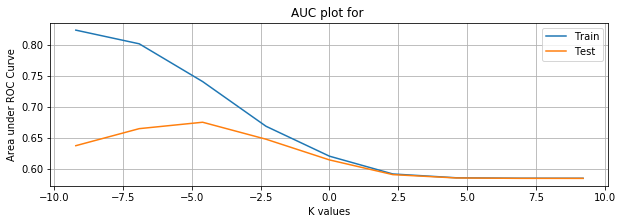

In [0]:
#https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html

print(SGD_BoW.best_params_) #Gives the best value of K from the given neighbor range
print(SGD_BoW.cv_results_['mean_train_score'])
print(SGD_BoW.cv_results_['mean_test_score'])


log_params = []
for i in parameters['alpha']:
  log_params.append(math.log(i))
  
print(log_params)

plt.figure(figsize=(10,3))
plt.plot(log_params,SGD_BoW.cv_results_['mean_train_score'], label="Train")
plt.plot(log_params,SGD_BoW.cv_results_['mean_test_score'], label="Test")
plt.title('AUC plot for ')
plt.xlabel('K values')
plt.ylabel('Area under ROC Curve')
plt.legend()
plt.grid()
plt.show()
plt.close()


In [0]:
#https://datascience.stackexchange.com/questions/22762/understanding-predict-proba-from-multioutputclassifier
#https://stackoverflow.com/questions/34894587/should-we-plot-the-roc-curve-for-each-class

from sklearn.metrics import roc_curve, auc

#training the model on the best K value found in the above result 
final_SGD_BoW = linear_model.SGDClassifier(loss='log', alpha=0.01, class_weight='balanced')
final_SGD_BoW.fit(x_train,y_train)

x_train_csr=x_train.tocsr()
x_test_csr=x_test.tocsr()

y_train_pred=[]
y_test_pred=[]

#ROC curve function takes the actual values and the predicted probabilities of the positive class
for i in range(0,x_train.shape[0]):
    y_train_pred.extend(final_SGD_BoW.predict_proba(x_train_csr[i])[:,1]) #[:,1] gives the probability for class 1

for i in range(0,x_test.shape[0]):
    y_test_pred.extend(final_SGD_BoW.predict_proba(x_test_csr[i])[:,1])

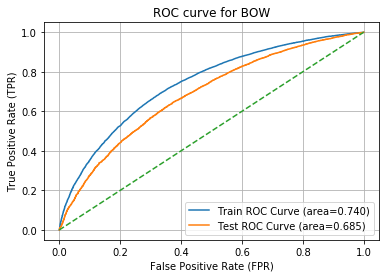

In [0]:
#https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
#https://www.programcreek.com/python/example/81207/sklearn.metrics.roc_curve
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html

#Calculating FPR and TPR for train and test data
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_pred)

#Calculating AUC for train and test curves
roc_auc_train=auc(train_fpr,train_tpr)
roc_auc_test=auc(test_fpr,test_tpr)

plt.plot(train_fpr, train_tpr, label="Train ROC Curve (area=%0.3f)" % roc_auc_train)
plt.plot(test_fpr, test_tpr, label="Test ROC Curve (area=%0.3f)" % roc_auc_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.legend()
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC curve for BOW")
plt.grid()

plt.show()
plt.close()

In [0]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
#https://datatofish.com/confusion-matrix-python/

from sklearn.metrics import confusion_matrix as cf_mx

expected_train = y_train.values
predicted_train = final_SGD_BoW.predict(x_train)

expected_test = y_test.values
predicted_test = final_SGD_BoW.predict(x_test)

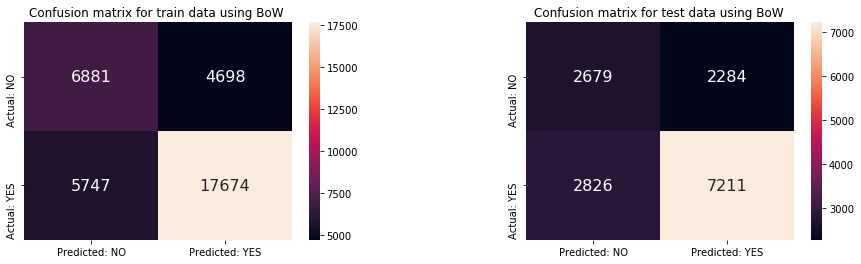

In [0]:
plt.subplots(figsize=(15,4))
plt.subplot(1,2,1)
cmdf_train=cf_mx(expected_train, predicted_train)
df_cm_train = pd.DataFrame(cmdf_train, range(2),range(2))
df_cm_train.columns = ['Predicted: NO','Predicted: YES']
df_cm_train = df_cm_train.rename({0: 'Actual: NO', 1: 'Actual: YES'})
sns.heatmap(df_cm_train, annot=True,annot_kws={"size": 16}, fmt='g')
plt.title('Confusion matrix for train data using BoW ')

plt.subplot(1,2,2)
cmdf_test=cf_mx(expected_test, predicted_test)
df_cm_test = pd.DataFrame(cmdf_test, range(2),range(2))
df_cm_test.columns = ['Predicted: NO','Predicted: YES']
df_cm_test = df_cm_test.rename({0: 'Actual: NO', 1: 'Actual: YES'})
sns.heatmap(df_cm_test, annot=True,annot_kws={"size": 16}, fmt='g')
plt.title('Confusion matrix for test data using BoW ')
plt.subplots_adjust(wspace=0.5)
plt.show()
plt.close()

**Observation:**
- The train and test times are very low and similar to Naive Bayes.
- The model seems to be produced better results after adding the parameter, class_weight='balanced'.


### 2.4.2 Applying LR brute force on TFIDF,<font color='red'> SET 2</font> (GridSearch)

### Hyper paramter tuning method: GridSearch

In [0]:
#https://www.digitalocean.com/community/tutorials/how-to-plot-data-in-python-3-using-matplotlib
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
#https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    
from scipy.sparse import hstack
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
import matplotlib.patches as mpatches
from sklearn.metrics import roc_auc_score

x_train_tfidf = hstack((categories_one_hot_train, sub_categories_one_hot_train, grade_cat_one_hot_train,
                  teacher_prefix_one_hot_train, school_state_one_hot_train, price_train_standardized,
                  prev_proj_train_standardized, text_train_tfidf, title_train_tfidf))
y_train_tfidf = df_train['project_is_approved']

x_test_tfidf = hstack((categories_one_hot_test, sub_categories_one_hot_test, grade_cat_one_hot_test,
                  teacher_prefix_one_hot_test, school_state_one_hot_test, price_test_standardized,
                  prev_proj_test_standardized, text_test_tfidf, title_test_tfidf))
y_test_tfidf = df_test['project_is_approved']

print(x_train_tfidf.shape, type(x_train_tfidf), y_train_tfidf.shape, type(y_train_tfidf))
print(x_test_tfidf.shape, type(x_test_tfidf), y_test_tfidf.shape, type(y_test_tfidf))

(35000, 6673) <class 'scipy.sparse.coo.coo_matrix'> (35000,) <class 'pandas.core.series.Series'>
(15000, 6673) <class 'scipy.sparse.coo.coo_matrix'> (15000,) <class 'pandas.core.series.Series'>


In [0]:
#https://stackabuse.com/cross-validation-and-grid-search-for-model-selection-in-python/
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

#Initialising Classifier
classifier = linear_model.SGDClassifier(loss='log', n_jobs=-1, class_weight='balanced')

#Brute force approach for finding best K value
parameters = {'alpha':[0.0001,0.001,0.01,0.1,1,10,100,1000,10000]}

#Training the model on train data
SGD_tfidf = GridSearchCV(classifier, parameters, return_train_score=True, cv=10, scoring='roc_auc', n_jobs=-1)
SGD_tfidf.fit(x_train_tfidf, y_train_tfidf)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight='balanced',
                                     early_stopping=False, epsilon=0.1,
                                     eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='log', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=-1,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000]},
             pre_dispatch='2*n_jobs', 

{'alpha': 0.0001}
[0.76430783 0.66373495 0.62663913 0.60033161 0.59218808 0.58574484
 0.58441869 0.58426482 0.58424889]
[0.67133602 0.62416259 0.61466202 0.59769605 0.59145497 0.5855708
 0.58432036 0.58416254 0.58414993]
[-9.210340371976182, -6.907755278982137, -4.605170185988091, -2.3025850929940455, 0.0, 2.302585092994046, 4.605170185988092, 6.907755278982137, 9.210340371976184]


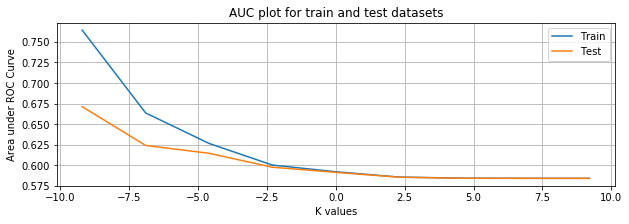

In [0]:
#https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html

print(SGD_tfidf.best_params_) #Gives the best value of K from the given neighbor range
print(SGD_tfidf.cv_results_['mean_train_score'])
print(SGD_tfidf.cv_results_['mean_test_score'])

log_params = []
for i in parameters['alpha']:
  log_params.append(math.log(i))
  
print(log_params)

plt.figure(figsize=(10,3))
plt.plot(log_params,SGD_tfidf.cv_results_['mean_train_score'], label="Train")
plt.plot(log_params,SGD_tfidf.cv_results_['mean_test_score'], label="Test")
plt.title('AUC plot for train and test datasets')
plt.xlabel('K values')
plt.ylabel('Area under ROC Curve')
plt.grid()
plt.legend()
plt.show()
plt.close()

In [0]:
#https://datascience.stackexchange.com/questions/22762/understanding-predict-proba-from-multioutputclassifier
#https://stackoverflow.com/questions/34894587/should-we-plot-the-roc-curve-for-each-class

from sklearn.metrics import roc_curve, auc

#training the model on the best K value found in the above result 
final_SGD_tfidf = linear_model.SGDClassifier(loss='log', alpha=0.0001, class_weight='balanced')
final_SGD_tfidf.fit(x_train_tfidf,y_train_tfidf)

x_train_tfidf_csr=x_train_tfidf.tocsr()
x_test_tfidf_csr=x_test_tfidf.tocsr()

y_train_tfidf_pred=[]
y_test_tfidf_pred=[]

#ROC curve function takes the actual values and the predicted probabilities of the positive class
for i in range(0,x_train_tfidf.shape[0]):
    y_train_tfidf_pred.extend(final_SGD_tfidf.predict_proba(x_train_tfidf_csr[i])[:,1]) #[:,1] gives the probability for class 1

for i in range(0,x_test_tfidf.shape[0]):
    y_test_tfidf_pred.extend(final_SGD_tfidf.predict_proba(x_test_tfidf_csr[i])[:,1])

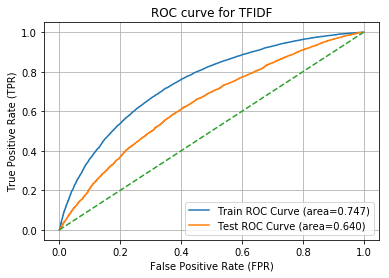

In [0]:
#https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
#https://www.programcreek.com/python/example/81207/sklearn.metrics.roc_curve
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html

#Calculating FPR and TPR for train and test data
train_tfidf_fpr, train_tfidf_tpr, train_tfidf_thresholds = roc_curve(y_train_tfidf, y_train_tfidf_pred)
test_tfidf_fpr, test_tfidf_tpr, test_tfidf_thresholds = roc_curve(y_test_tfidf, y_test_tfidf_pred)

#Calculating AUC for train and test curves
roc_auc_tfidf_train=auc(train_tfidf_fpr,train_tfidf_tpr)
roc_auc_tfidf_test=auc(test_tfidf_fpr,test_tfidf_tpr)

plt.plot(train_tfidf_fpr, train_tfidf_tpr, label="Train ROC Curve (area=%0.3f)" % roc_auc_tfidf_train)
plt.plot(test_tfidf_fpr, test_tfidf_tpr, label="Test ROC Curve (area=%0.3f)" % roc_auc_tfidf_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.legend()
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC curve for TFIDF")
plt.grid()
plt.show()
plt.close()

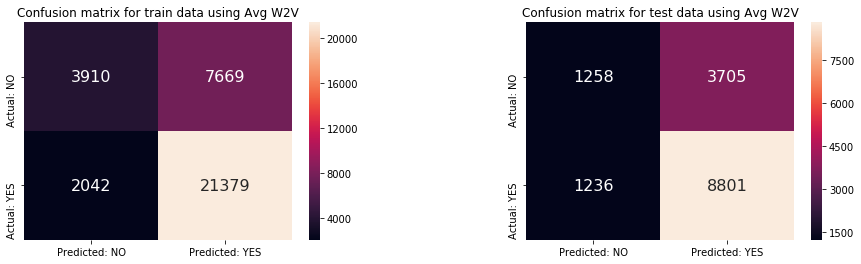

In [0]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
#https://datatofish.com/confusion-matrix-python/

from sklearn.metrics import confusion_matrix as cf_mx

expected_train_tfidf = y_train_tfidf.values
predicted_train_tfidf = final_SGD_tfidf.predict(x_train_tfidf)

expected_test_tfidf = y_test_tfidf.values
predicted_test_tfidf = final_SGD_tfidf.predict(x_test_tfidf)

plt.subplots(figsize=(15,4))
plt.subplot(1,2,1)
cmdf_train=cf_mx(expected_train_tfidf, predicted_train_tfidf)
df_cm_train = pd.DataFrame(cmdf_train, range(2),range(2))
df_cm_train.columns = ['Predicted: NO','Predicted: YES']
df_cm_train = df_cm_train.rename({0: 'Actual: NO', 1: 'Actual: YES'})
sns.heatmap(df_cm_train, annot=True,annot_kws={"size": 16}, fmt='g')
plt.title('Confusion matrix for train data using Avg W2V')

plt.subplot(1,2,2)
cmdf_test=cf_mx(expected_test_tfidf, predicted_test_tfidf)
df_cm_test = pd.DataFrame(cmdf_test, range(2),range(2))
df_cm_test.columns = ['Predicted: NO','Predicted: YES']
df_cm_test = df_cm_test.rename({0: 'Actual: NO', 1: 'Actual: YES'})
sns.heatmap(df_cm_test, annot=True,annot_kws={"size": 16}, fmt='g')
plt.title('Confusion matrix for test data using Avg W2V')
plt.subplots_adjust(wspace=0.5)
plt.show()
plt.close()

**Observation:**
- The train and test times are very low and similar to Naive Bayes.
- The model seems to be produced better results after adding the parameter, class_weight='balanced'.

### 2.4.3 Applying LR brute force on AVG W2V,<font color='red'> SET 3</font>

### Hyper paramter tuning method: GridSearch

In [0]:
#https://www.digitalocean.com/community/tutorials/how-to-plot-data-in-python-3-using-matplotlib
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
#https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    
from scipy.sparse import hstack
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
import matplotlib.patches as mpatches
from sklearn.metrics import roc_auc_score

x_train_avg_w2v = hstack((categories_one_hot_train, sub_categories_one_hot_train, grade_cat_one_hot_train,
                  teacher_prefix_one_hot_train, school_state_one_hot_train, price_train_standardized,
                  prev_proj_train_standardized, avg_w2v_train_text_vectors, avg_w2v_title_train_vectors))
y_train_avg_w2v = df_train['project_is_approved']

x_test_avg_w2v = hstack((categories_one_hot_test, sub_categories_one_hot_test, grade_cat_one_hot_test,
                  teacher_prefix_one_hot_test, school_state_one_hot_test, price_test_standardized,
                  prev_proj_test_standardized, avg_w2v_test_text_vectors, avg_w2v_title_test_vectors))
y_test_avg_w2v = df_test['project_is_approved']

print(x_train_avg_w2v.shape, type(x_train_avg_w2v), y_train_avg_w2v.shape, type(y_train_avg_w2v))
print(x_test_avg_w2v.shape, type(x_test_avg_w2v), y_test_avg_w2v.shape, type(y_test_avg_w2v))

(35000, 702) <class 'scipy.sparse.coo.coo_matrix'> (35000,) <class 'pandas.core.series.Series'>
(15000, 702) <class 'scipy.sparse.coo.coo_matrix'> (15000,) <class 'pandas.core.series.Series'>


In [0]:
#https://stackabuse.com/cross-validation-and-grid-search-for-model-selection-in-python/
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

#Initialising Classifier
classifier = linear_model.SGDClassifier(loss='log', n_jobs=-1, class_weight='balanced')

#Brute force approach for finding best K value
parameters = {'alpha':[0.0001,0.001,0.01,0.1,1,10,100,1000,10000]}

#Training the model on train data
SGD_avg_w2v = GridSearchCV(classifier, parameters, return_train_score=True, cv=10, scoring='roc_auc', n_jobs=-1)
SGD_avg_w2v.fit(x_train_avg_w2v, y_train_avg_w2v)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight='balanced',
                                     early_stopping=False, epsilon=0.1,
                                     eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='log', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=-1,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000]},
             pre_dispatch='2*n_jobs', 

{'alpha': 0.001}
[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000] [0.67453178 0.68664021 0.67416544 0.63565117 0.60254139 0.58657245
 0.58503109 0.58490616 0.58489318] [0.65459765 0.6675511  0.66099616 0.6297215  0.60090096 0.58616385
 0.58487248 0.58477033 0.58476605]
[-9.210340371976182, -6.907755278982137, -4.605170185988091, -2.3025850929940455, 0.0, 2.302585092994046, 4.605170185988092, 6.907755278982137, 9.210340371976184]


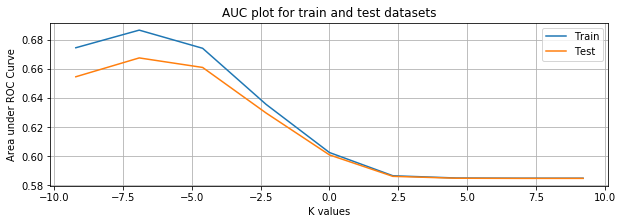

In [0]:
#https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html

print(SGD_avg_w2v.best_params_) #Gives the best value of K from the given neighbor range
print(parameters['alpha'],SGD_avg_w2v.cv_results_['mean_train_score'], SGD_avg_w2v.cv_results_['mean_test_score'])

log_params = []
for i in parameters['alpha']:
  log_params.append(math.log(i))
  
print(log_params)

plt.figure(figsize=(10,3))
plt.plot(log_params,SGD_avg_w2v.cv_results_['mean_train_score'], label="Train")
plt.plot(log_params,SGD_avg_w2v.cv_results_['mean_test_score'], label="Test")
plt.title('AUC plot for train and test datasets')
plt.xlabel('K values')
plt.ylabel('Area under ROC Curve')
plt.legend()
plt.grid()
plt.show()
plt.close()

In [0]:
#https://datascience.stackexchange.com/questions/22762/understanding-predict-proba-from-multioutputclassifier
#https://stackoverflow.com/questions/34894587/should-we-plot-the-roc-curve-for-each-class

from sklearn.metrics import roc_curve, auc

#training the model on the best K value found in the above result 
final_SGD_avg_w2v = linear_model.SGDClassifier(loss='log', alpha=0.001, n_jobs=-1, class_weight='balanced')
final_SGD_avg_w2v.fit(x_train_avg_w2v,y_train_avg_w2v)

x_train_avg_w2v_csr=x_train_avg_w2v.tocsr()
x_test_avg_w2v_csr=x_test_avg_w2v.tocsr()

y_train_avg_w2v_pred=[]
y_test_avg_w2v_pred=[]

#ROC curve function takes the actual values and the predicted probabilities of the positive class
for i in range(0,x_train_avg_w2v.shape[0]):
    y_train_avg_w2v_pred.extend(final_SGD_avg_w2v.predict_proba(x_train_avg_w2v_csr[i])[:,1]) #[:,1] gives the probability for class 1

for i in range(0,x_test_avg_w2v.shape[0]):
    y_test_avg_w2v_pred.extend(final_SGD_avg_w2v.predict_proba(x_test_avg_w2v_csr[i])[:,1])
    

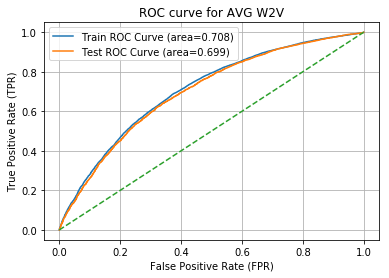

In [0]:
#https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
#https://www.programcreek.com/python/example/81207/sklearn.metrics.roc_curve
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html

#Calculating FPR and TPR for train and test data
train_avg_w2v_fpr, train_avg_w2v_tpr, train_avg_w2v_thresholds = roc_curve(y_train_avg_w2v, y_train_avg_w2v_pred)
test_avg_w2v_fpr, test_avg_w2v_tpr, test_avg_w2v_thresholds = roc_curve(y_test_avg_w2v, y_test_avg_w2v_pred)

#Calculating AUC for train and test curves
roc_auc_avg_w2v_train=auc(train_avg_w2v_fpr,train_avg_w2v_tpr)
roc_auc_avg_w2v_test=auc(test_avg_w2v_fpr,test_avg_w2v_tpr)

plt.plot(train_avg_w2v_fpr, train_avg_w2v_tpr, label="Train ROC Curve (area=%0.3f)" % roc_auc_avg_w2v_train)
plt.plot(test_avg_w2v_fpr, test_avg_w2v_tpr, label="Test ROC Curve (area=%0.3f)" % roc_auc_avg_w2v_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.legend()
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC curve for AVG W2V")
plt.grid()
plt.show()
plt.close()

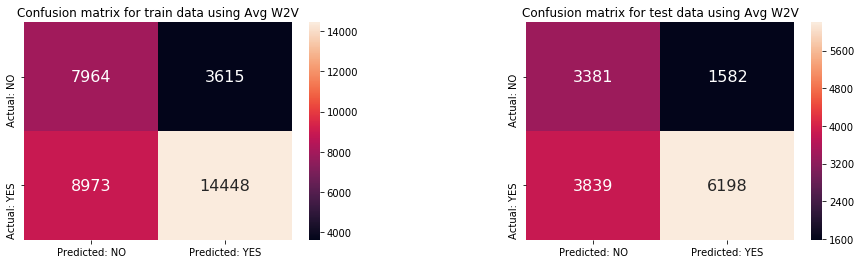

In [0]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
#https://datatofish.com/confusion-matrix-python/

from sklearn.metrics import confusion_matrix as cf_mx

expected_avg_train_w2v = y_train_avg_w2v.values
predicted_avg_train_w2v = final_SGD_avg_w2v.predict(x_train_avg_w2v)

expected_avg_test_w2v = y_test_avg_w2v.values
predicted_avg_test_w2v = final_SGD_avg_w2v.predict(x_test_avg_w2v)

plt.subplots(figsize=(15,4))
plt.subplot(1,2,1)
cmdf_train=cf_mx(expected_avg_train_w2v, predicted_avg_train_w2v)
df_cm_train = pd.DataFrame(cmdf_train, range(2),range(2))
df_cm_train.columns = ['Predicted: NO','Predicted: YES']
df_cm_train = df_cm_train.rename({0: 'Actual: NO', 1: 'Actual: YES'})
sns.heatmap(df_cm_train, annot=True,annot_kws={"size": 16}, fmt='g')
plt.title('Confusion matrix for train data using Avg W2V')

plt.subplot(1,2,2)
cmdf_test=cf_mx(expected_avg_test_w2v, predicted_avg_test_w2v)
df_cm_test = pd.DataFrame(cmdf_test, range(2),range(2))
df_cm_test.columns = ['Predicted: NO','Predicted: YES']
df_cm_test = df_cm_test.rename({0: 'Actual: NO', 1: 'Actual: YES'})
sns.heatmap(df_cm_test, annot=True,annot_kws={"size": 16}, fmt='g')
plt.title('Confusion matrix for test data using Avg W2V')
plt.subplots_adjust(wspace=0.5)
plt.show()
plt.close()

**Observation:**
- The train and test times are very low and similar to Naive Bayes.
- The model seems to be produced better results after adding the parameter, class_weight='balanced'.


### 2.4.4 Applying LR brute force on TFIDF W2V,<font color='red'> SET 4</font>

### Hyper paramter tuning method: GridSearch

In [0]:
#https://www.digitalocean.com/community/tutorials/how-to-plot-data-in-python-3-using-matplotlib
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
#https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    
from scipy.sparse import hstack
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
import matplotlib.patches as mpatches
from sklearn.metrics import roc_auc_score

x_train_tfidf_w2v = hstack((categories_one_hot_train, sub_categories_one_hot_train, grade_cat_one_hot_train,
                  teacher_prefix_one_hot_train, school_state_one_hot_train, price_train_standardized,
                  prev_proj_train_standardized, tfidf_w2v_train_text_vectors, tfidf_w2v_train_title_vectors))
y_train_tfidf_w2v = df_train['project_is_approved']

x_test_tfidf_w2v = hstack((categories_one_hot_test, sub_categories_one_hot_test, grade_cat_one_hot_test,
                  teacher_prefix_one_hot_test, school_state_one_hot_test, price_test_standardized,
                  prev_proj_test_standardized, tfidf_w2v_test_text_vectors, tfidf_w2v_test_title_vectors))
y_test_tfidf_w2v = df_test['project_is_approved']

print(x_train_tfidf_w2v.shape, type(x_train_tfidf_w2v), y_train_tfidf_w2v.shape, type(y_train_tfidf_w2v))
print(x_test_tfidf_w2v.shape, type(x_test_tfidf_w2v), y_test_tfidf_w2v.shape, type(y_test_tfidf_w2v))

(35000, 702) <class 'scipy.sparse.coo.coo_matrix'> (35000,) <class 'pandas.core.series.Series'>
(15000, 702) <class 'scipy.sparse.coo.coo_matrix'> (15000,) <class 'pandas.core.series.Series'>


In [0]:
#https://stackabuse.com/cross-validation-and-grid-search-for-model-selection-in-python/
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

#Initialising Classifier
classifier = linear_model.SGDClassifier(loss='log', n_jobs=-1, class_weight='balanced')

#Brute force approach for finding best K value
parameters = {'alpha':[0.0001,0.001,0.01,0.1,1,10,100,1000,10000]}

#Training the model on train data
SGD_tfidf_w2v = GridSearchCV(classifier, parameters, return_train_score=True, cv=3, scoring='roc_auc', n_jobs=-1)
SGD_tfidf_w2v.fit(x_train_tfidf_w2v, y_train_tfidf_w2v)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight='balanced',
                                     early_stopping=False, epsilon=0.1,
                                     eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='log', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=-1,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000]},
             pre_dispatch='2*n_jobs', r

{'alpha': 0.01}
[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000] [0.70015368 0.70342332 0.69832099 0.65175192 0.61015137 0.58736828
 0.5853378  0.5851549  0.58513289] [0.67046474 0.67546942 0.68107162 0.64492487 0.60779648 0.58697895
 0.58522553 0.58508387 0.58506174]
[-9.210340371976182, -6.907755278982137, -4.605170185988091, -2.3025850929940455, 0.0, 2.302585092994046, 4.605170185988092, 6.907755278982137, 9.210340371976184]


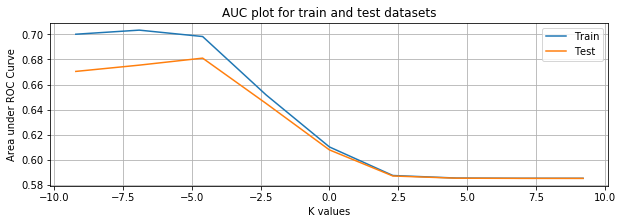

In [0]:
#https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html
print(SGD_tfidf_w2v.best_params_) #Gives the best value of K from the given neighbor range
print(parameters['alpha'],SGD_tfidf_w2v.cv_results_['mean_train_score'], SGD_tfidf_w2v.cv_results_['mean_test_score'])

log_params = []
for i in parameters['alpha']:
  log_params.append(math.log(i))
  
print(log_params)

plt.figure(figsize=(10,3))
plt.plot(log_params,SGD_tfidf_w2v.cv_results_['mean_train_score'], label="Train")
plt.plot(log_params,SGD_tfidf_w2v.cv_results_['mean_test_score'], label="Test")
plt.title('AUC plot for train and test datasets')
plt.xlabel('K values')
plt.ylabel('Area under ROC Curve')
plt.legend()
plt.grid()
plt.show()
plt.close()

In [0]:
#https://datascience.stackexchange.com/questions/22762/understanding-predict-proba-from-multioutputclassifier
#https://stackoverflow.com/questions/34894587/should-we-plot-the-roc-curve-for-each-class

from sklearn.metrics import roc_curve, auc

#training the model on the best K value found in the above result 
final_SGD_tfidf_w2v = linear_model.SGDClassifier(loss='log', alpha=0.01, n_jobs=-1, class_weight='balanced')
final_SGD_tfidf_w2v.fit(x_train_tfidf_w2v,y_train_tfidf_w2v)

x_train_tfidf_w2v_csr=x_train_tfidf_w2v.tocsr()
x_test_tfidf_w2v_csr=x_test_tfidf_w2v.tocsr()

y_train_tfidf_w2v_pred=[]
y_test_tfidf_w2v_pred=[]

#ROC curve function takes the actual values and the predicted probabilities of the positive class
for i in range(0,x_train_tfidf_w2v.shape[0]):
    y_train_tfidf_w2v_pred.extend(final_SGD_tfidf_w2v.predict_proba(x_train_tfidf_w2v_csr[i])[:,1]) #[:,1] gives the probability for class 1

for i in range(0,x_test_tfidf_w2v.shape[0]):
    y_test_tfidf_w2v_pred.extend(final_SGD_tfidf_w2v.predict_proba(x_test_tfidf_w2v_csr[i])[:,1])

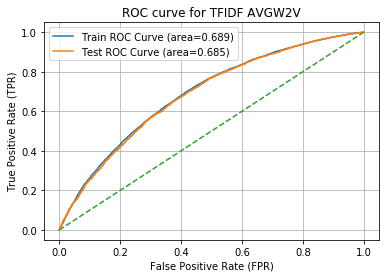

In [0]:
#https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
#https://www.programcreek.com/python/example/81207/sklearn.metrics.roc_curve
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html

#Calculating FPR and TPR for train and test data
train_tfidf_w2v_fpr, train_tfidf_w2v_tpr, train_tfidf_w2v_thresholds = roc_curve(y_train_tfidf_w2v, y_train_tfidf_w2v_pred)
test_tfidf_w2v_fpr, test_tfidf_w2v_tpr, test_tfidf_w2v_thresholds = roc_curve(y_test_tfidf_w2v, y_test_tfidf_w2v_pred)

#Calculating AUC for train and test curves
roc_auc_tfidf_w2v_train=auc(train_tfidf_w2v_fpr,train_tfidf_w2v_tpr)
roc_auc_tfidf_w2v_test=auc(test_tfidf_w2v_fpr,test_tfidf_w2v_tpr)

plt.plot(train_tfidf_w2v_fpr, train_tfidf_w2v_tpr, label="Train ROC Curve (area=%0.3f)" % roc_auc_tfidf_w2v_train)
plt.plot(test_tfidf_w2v_fpr, test_tfidf_w2v_tpr, label="Test ROC Curve (area=%0.3f)" % roc_auc_tfidf_w2v_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.legend()
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC curve for TFIDF AVGW2V")
plt.grid()
plt.show()
plt.close()

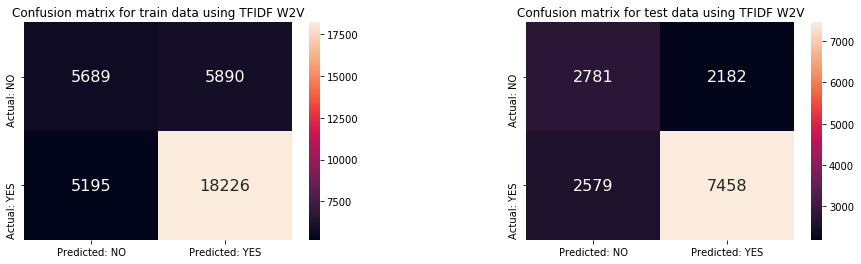

In [0]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
#https://datatofish.com/confusion-matrix-python/

from sklearn.metrics import confusion_matrix as cf_mx

expected_tfidf_train_w2v = y_train_tfidf_w2v.values
predicted_tfidf_train_w2v = final_SGD_tfidf_w2v.predict(x_train_tfidf_w2v)

expected_tfidf_test_w2v = y_test_tfidf_w2v.values
predicted_tfidf_test_w2v = final_SGD_avg_w2v.predict(x_test_tfidf_w2v)

plt.subplots(figsize=(15,4))
plt.subplot(1,2,1)
cmdf_train=cf_mx(expected_tfidf_train_w2v, predicted_tfidf_train_w2v)
df_cm_train = pd.DataFrame(cmdf_train, range(2),range(2))
df_cm_train.columns = ['Predicted: NO','Predicted: YES']
df_cm_train = df_cm_train.rename({0: 'Actual: NO', 1: 'Actual: YES'})
sns.heatmap(df_cm_train, annot=True,annot_kws={"size": 16}, fmt='g')
plt.title('Confusion matrix for train data using TFIDF W2V')

plt.subplot(1,2,2)
cmdf_test=cf_mx(expected_tfidf_test_w2v, predicted_tfidf_test_w2v)
df_cm_test = pd.DataFrame(cmdf_test, range(2),range(2))
df_cm_test.columns = ['Predicted: NO','Predicted: YES']
df_cm_test = df_cm_test.rename({0: 'Actual: NO', 1: 'Actual: YES'})
sns.heatmap(df_cm_test, annot=True,annot_kws={"size": 16}, fmt='g')
plt.title('Confusion matrix for test data using TFIDF W2V')
plt.subplots_adjust(wspace=0.5)
plt.show()
plt.close()

**Observation:**
- The train and test times are very low and similar to Naive Bayes.
- The model seems to be produced better results after adding the parameter, class_weight='balanced'.


### 2.5 Logistic Regression with added Features, <font color='red'> Set 5 </font>

### Hyper paramter tuning method: GridSearch

In [0]:
#https://www.digitalocean.com/community/tutorials/how-to-plot-data-in-python-3-using-matplotlib
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
#https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    
from scipy.sparse import hstack
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
import matplotlib.patches as mpatches
from sklearn.metrics import roc_auc_score

x_train_set5 = hstack((categories_one_hot_train, sub_categories_one_hot_train, grade_cat_one_hot_train,
                  teacher_prefix_one_hot_train, school_state_one_hot_train, price_train_standardized,
                  prev_proj_train_standardized, wc_title_train_standardized, wc_essay_train_standardized, senti_score_train_standardized,
                            tfidf_w2v_train_text_vectors, tfidf_w2v_train_title_vectors))
y_train_set5 = df_train['project_is_approved']

x_test_set5 = hstack((categories_one_hot_test, sub_categories_one_hot_test, grade_cat_one_hot_test,
                  teacher_prefix_one_hot_test, school_state_one_hot_test, price_test_standardized,
                  prev_proj_test_standardized, wc_title_test_standardized, wc_essay_test_standardized, senti_score_test_standardized, 
                      tfidf_w2v_test_text_vectors, tfidf_w2v_test_title_vectors))
y_test_set5 = df_test['project_is_approved']

print(x_train_set5.shape, type(x_train_set5), y_train_set5.shape, type(y_train_set5))
print(x_test_set5.shape, type(x_test_set5), y_test_set5.shape, type(y_test_set5))

(35000, 705) <class 'scipy.sparse.coo.coo_matrix'> (35000,) <class 'pandas.core.series.Series'>
(15000, 705) <class 'scipy.sparse.coo.coo_matrix'> (15000,) <class 'pandas.core.series.Series'>


In [0]:
#https://stackabuse.com/cross-validation-and-grid-search-for-model-selection-in-python/
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

#Initialising Classifier
classifier = linear_model.SGDClassifier(loss='log', n_jobs=-1, class_weight='balanced')

#Brute force approach for finding best K value
parameters = {'alpha':[0.0001,0.001,0.01,0.1,1,10,100,1000,10000]}

#Training the model on train data
SGD_set5 = GridSearchCV(classifier, parameters, return_train_score=True, cv=3, scoring='roc_auc', n_jobs=-1)
SGD_set5.fit(x_train_set5, y_train_set5)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight='balanced',
                                     early_stopping=False, epsilon=0.1,
                                     eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='log', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=-1,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000]},
             pre_dispatch='2*n_jobs', r

{'alpha': 0.001}
[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000] [0.71312263 0.72416733 0.70205953 0.66191593 0.62465594 0.59303973
 0.58681139 0.58604039 0.58595543] [0.68068761 0.69528028 0.68637301 0.65644109 0.62258638 0.59254074
 0.58667079 0.5859473  0.58586695]
[-9.210340371976182, -6.907755278982137, -4.605170185988091, -2.3025850929940455, 0.0, 2.302585092994046, 4.605170185988092, 6.907755278982137, 9.210340371976184]


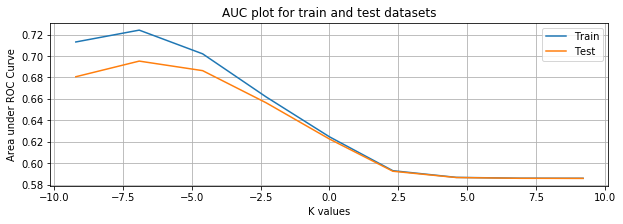

In [0]:
#https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html
print(SGD_set5.best_params_) #Gives the best value of K from the given neighbor range
print(parameters['alpha'],SGD_set5.cv_results_['mean_train_score'], SGD_set5.cv_results_['mean_test_score'])

log_params = []
for i in parameters['alpha']:
  log_params.append(math.log(i))
  
print(log_params)

plt.figure(figsize=(10,3))
plt.plot(log_params,SGD_set5.cv_results_['mean_train_score'], label="Train")
plt.plot(log_params,SGD_set5.cv_results_['mean_test_score'], label="Test")
plt.title('AUC plot for train and test datasets')
plt.xlabel('K values')
plt.ylabel('Area under ROC Curve')
plt.legend()
plt.grid()
plt.show()
plt.close()

In [0]:
#https://datascience.stackexchange.com/questions/22762/understanding-predict-proba-from-multioutputclassifier
#https://stackoverflow.com/questions/34894587/should-we-plot-the-roc-curve-for-each-class

from sklearn.metrics import roc_curve, auc

#training the model on the best K value found in the above result 
final_SGD_set5 = linear_model.SGDClassifier(loss='log', alpha=0.001, n_jobs=-1, class_weight='balanced')
final_SGD_set5.fit(x_train_set5,y_train_set5)

x_train_set5=x_train_set5.tocsr()
x_test_set5=x_test_set5.tocsr()

y_train_set5_pred=[]
y_test_set5_pred=[]

#ROC curve function takes the actual values and the predicted probabilities of the positive class
for i in range(0,x_train_set5.shape[0]):
    y_train_set5_pred.extend(final_SGD_set5.predict_proba(x_train_set5[i])[:,1]) #[:,1] gives the probability for class 1

for i in range(0,x_test_set5.shape[0]):
    y_test_set5_pred.extend(final_SGD_set5.predict_proba(x_test_set5[i])[:,1])

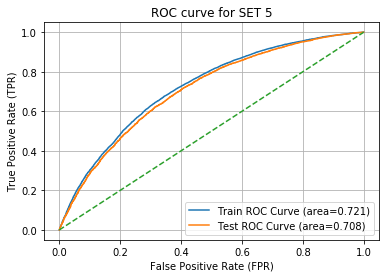

In [0]:
#https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
#https://www.programcreek.com/python/example/81207/sklearn.metrics.roc_curve
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html

#Calculating FPR and TPR for train and test data
train_set5_fpr, train_set5_tpr, train_set5_thresholds = roc_curve(y_train_set5, y_train_set5_pred)
test_set5_fpr, test_set5_tpr, test_set5_thresholds = roc_curve(y_test_set5, y_test_set5_pred)

#Calculating AUC for train and test curves
roc_auc_set5_train=auc(train_set5_fpr,train_set5_tpr)
roc_auc_set5_test=auc(test_set5_fpr,test_set5_tpr)

plt.plot(train_set5_fpr, train_set5_tpr, label="Train ROC Curve (area=%0.3f)" % roc_auc_set5_train)
plt.plot(test_set5_fpr, test_set5_tpr, label="Test ROC Curve (area=%0.3f)" % roc_auc_set5_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.legend()
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC curve for SET 5")
plt.grid()
plt.show()
plt.close()

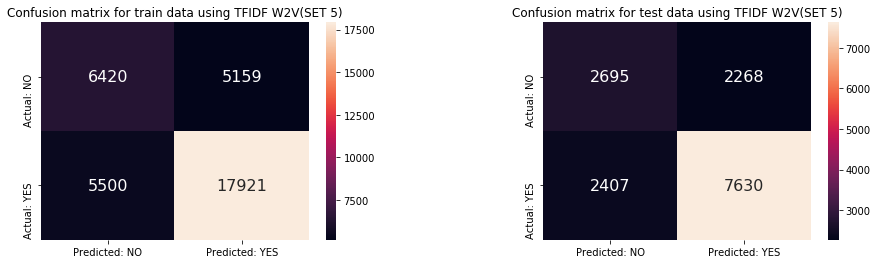

In [0]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
#https://datatofish.com/confusion-matrix-python/

from sklearn.metrics import confusion_matrix as cf_mx

expected_set5_train = y_train_set5.values
predicted_set5_train = final_SGD_set5.predict(x_train_set5)

expected_set5_test = y_test_set5.values
predicted_set5_test = final_SGD_set5.predict(x_test_set5)

plt.subplots(figsize=(15,4))
plt.subplot(1,2,1)
cmdf_train=cf_mx(expected_set5_train, predicted_set5_train)
df_cm_train = pd.DataFrame(cmdf_train, range(2),range(2))
df_cm_train.columns = ['Predicted: NO','Predicted: YES']
df_cm_train = df_cm_train.rename({0: 'Actual: NO', 1: 'Actual: YES'})
sns.heatmap(df_cm_train, annot=True,annot_kws={"size": 16}, fmt='g')
plt.title('Confusion matrix for train data using TFIDF W2V(SET 5)')

plt.subplot(1,2,2)
cmdf_test=cf_mx(expected_set5_test, predicted_set5_test)
df_cm_test = pd.DataFrame(cmdf_test, range(2),range(2))
df_cm_test.columns = ['Predicted: NO','Predicted: YES']
df_cm_test = df_cm_test.rename({0: 'Actual: NO', 1: 'Actual: YES'})
sns.heatmap(df_cm_test, annot=True,annot_kws={"size": 16}, fmt='g')
plt.title('Confusion matrix for test data using TFIDF W2V(SET 5)')
plt.subplots_adjust(wspace=0.5)
plt.show()
plt.close()

**Observation:**
- The train and test times are very low and similar to Naive Bayes.
- The model seems to be produced better results after adding the parameter, class_weight='balanced'.


# 3. Conclusions

In [0]:
#http://zetcode.com/python/prettytable/

from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ["Vectorizer", "Model", "Hyper parameter(K)", "AUC(Train Data)", "AUC(Test Data)"]

x.add_row(["BoW", "Brute", 0.01, 0.740, 0.685])
x.add_row(["TFIDF", "Brute", 0.0001, 0.747, 0.640])
x.add_row(["W2V", "Brute", 0.001, 0.708, 0.699])
x.add_row(["TFIDF AVG W2V", "Brute", 0.01, 0.689, 0.685])
x.add_row(["TFIDF AVG W2V(SET 5)", "Brute", 0.001, 0.721, 0.728])

print(x)

+----------------------+-------+--------------------+-----------------+----------------+
|      Vectorizer      | Model | Hyper parameter(K) | AUC(Train Data) | AUC(Test Data) |
+----------------------+-------+--------------------+-----------------+----------------+
|         BoW          | Brute |        0.01        |       0.74      |     0.685      |
|        TFIDF         | Brute |       0.0001       |      0.747      |      0.64      |
|         W2V          | Brute |       0.001        |      0.708      |     0.699      |
|    TFIDF AVG W2V     | Brute |        0.01        |      0.689      |     0.685      |
| TFIDF AVG W2V(SET 5) | Brute |       0.001        |      0.721      |     0.728      |
+----------------------+-------+--------------------+-----------------+----------------+


- As the dataset is imbalanced, the results seem to be biased towards the positive class.
- Addition of 3 numerical features in SET 5 seem to have produced slightly better results on test data.